In [2]:
import scipy.io
import numpy as np

In [22]:
#design_matrix = scipy.io.loadmat('Orange_02_2021_design_matrix_only.mat')['Orange_02_2021_design_matrix']
design_matrix = scipy.io.loadmat('02_2021_yellow_design_matrix.mat')['yellow_design_matrix_P5_only']
design_matrix.shape

(585, 10)

In [23]:
#target_Zdff_values=scipy.io.loadmat('Orange_02_2021_design_matrix_only.mat')['Zdff_target_values']
target_Zdff_values=scipy.io.loadmat('02_2021_yellow_design_matrix.mat')['yellow_Zdff_P5_only']
target_Zdff_values.shape

(585, 1)

In [24]:
def time_shift_matrix(time_series, before, after):
    padded_time_series = np.pad(time_series, (before, after))
    time_shifts = []
    for i in range(before+after + 1):
        temp = padded_time_series[i:i+time_series.shape[0]]
        time_shifts.append(temp)
    return time_shifts

In [25]:
before = 3
after = 3
time_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8]

full_design_matrix = []
for i in range(design_matrix.shape[-1] -1):
    if i in time_indices:
        full_design_matrix.extend(time_shift_matrix(design_matrix[:, i], before, after))
    else:
        full_design_matrix.append(design_matrix[:, i])
full_design_matrix = np.stack(full_design_matrix)

In [26]:
full_design_matrix=np.transpose(full_design_matrix)
full_design_matrix.shape

(585, 63)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

alpha = 0.1 #anything as high as 1 gives similar coefficients; 10 they go down
ridge = Ridge(alpha)
ridge.fit(full_design_matrix,target_Zdff_values)
ridge.get_params(deep=True)
ridge.predict(full_design_matrix)
ridge.score(full_design_matrix,target_Zdff_values,sample_weight=None)
#ridge.set_params(alpha=alpha,...

0.1656337828352129

In [9]:
prediction=ridge.predict(full_design_matrix)
prediction.shape

(585, 1)

In [51]:
ridge.coef_

array([[ 6.01639389e-01,  8.42446505e-01,  3.23980652e-01,
        -1.26996172e-01,  2.41986466e-01, -1.98721372e-02,
        -4.97374005e-02,  4.93294875e-01,  5.22788706e-01,
         5.61253145e-01,  6.16644142e-01,  2.14298152e-01,
        -2.66967327e-01, -4.69924908e-01, -4.64858321e-01,
        -1.05307089e-01, -2.05476726e-01,  1.36399259e-02,
        -2.28400739e-01, -5.60813924e-02,  4.27600563e-01,
        -4.77389082e-02, -9.34836833e-02, -9.90576875e-02,
        -1.36677657e-01, -2.47834611e-01, -3.97952421e-01,
        -2.42172370e-01,  2.73624736e-01,  2.25046627e-01,
        -1.05009752e-01,  2.90932505e-02,  1.20725640e-01,
         1.54586313e-01, -2.68510509e-01, -1.15744670e-01,
        -1.45151786e-02,  4.87923081e-01,  2.85564157e-01,
        -3.61191879e-04, -8.14640810e-02, -5.36883183e-02,
         5.23642231e-01,  5.16414762e-01,  1.65620112e-01,
        -4.93321283e-02, -6.56782680e-02,  1.13160539e-01,
        -6.34944979e-02,  4.05468158e-02, -6.84976053e-0

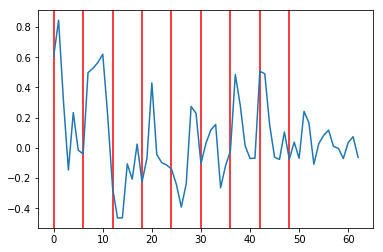

In [85]:
import matplotlib.pyplot as plt
x=ridge.coef_
z=np.transpose(x)
xpoints = (0,6,12,18,24,30,36,42,48)

for p in xpoints:

    plt.axvline(p,color='r') #vertical lines should be actual event for each feature (design matrix thenn includes 5 shifted of each plus the original, 6 reps per feature total)
plt.plot(z)
plt.show();




In [158]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge, full_design_matrix, target_Zdff_values, cv=5)
print("%0.2f r^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-17265755350179611591726596096.00 r^2 with a standard deviation of 34089680866600465258447372288.00


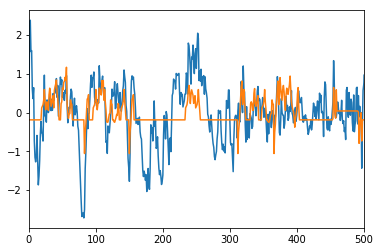

In [159]:
import matplotlib.pyplot as plt
plt.plot(target_Zdff_values)
plt.plot(prediction)
plt.xlim([0,500])
plt.show()

In [58]:
import scipy.io
from sklearn.linear_model import TweedieRegressor


TweedieRegressor = TweedieRegressor(power=1,alpha=0.5,link='log')
TweedieRegressor.fit(full_design_matrix,target_Zdff_values,sample_weight=None)
TweedieRegressor.get_params(deep=True)
TweedieRegressor.predict(full_design_matrix)
TweedieRegressor.score(full_design_matrix,target_Zdff_values,sample_weight=None)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Some value(s) of y are out of the valid range for family TweedieDistribution